# Comunicações e Processamento de Sinal (CPS)
## Semana 5 
## Modulações Digitais M-árias

In [197]:
import numpy as np
import matplotlib.pyplot as plt

In [198]:
#np.random.seed(0)
#mensagem = np.array([0,1,1,0,1,0,0,1,1])
mensagem = np.random.randint(0,2, 100)
#randint(low, high=None, size=None, dtype=int)
#Return random integers from `low` (inclusive) to `high` (exclusive).

In [199]:
mensagem

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1])

# QPSK - Quadrature Phase Shift Keying
$ s_0(t) = A \cos(2 \pi f_c t + \pi/4), 0< t < T_b$

$ s_1(t) = A \cos(2 \pi f_c t + 3\pi/4), 0< t < T_b$

$ s_2(t) = A \cos(2 \pi f_c t + 5\pi/4), 0< t < T_b$

$ s_3(t) = A \cos(2 \pi f_c t + 7\pi/4), 0< t < T_b$

In [201]:
#### CRIAR SINAL s0 , s1, s2 e s3 que codificam bit 0 e bit 1 ####
#########################################################
fc = 400 #Hz
# Tb - tempo para transmitir 1 bit
Tb = 3 * 1/fc  # assumir 3 periodos da sinusoide
A = 2
Fs = 4000 # Fs >> 2 fmax -> Teoria da Amostragem
t = np.arange(0,Tb, 1/Fs)
phi1 = np.cos(2*np.pi*fc*t)
phi2 = np.sin(2*np.pi*fc*t)
Sinal0 = A *np.cos(np.pi/4) * phi1 - A*np.sin(np.pi/4) * phi2 # sinal para o 11
Sinal1 = A *np.cos(3*np.pi/4) * phi1 - A*np.sin(3*np.pi/4) * phi2  # sinal para o 10
Sinal2 = A *np.cos(5*np.pi/4) * phi1 - A*np.sin(5*np.pi/4) * phi2  # sinal para o 01
Sinal3 = A *np.cos(7*np.pi/4) * phi1 - A*np.sin(7*np.pi/4) * phi2  # sinal para o 00
N = len(t)

30

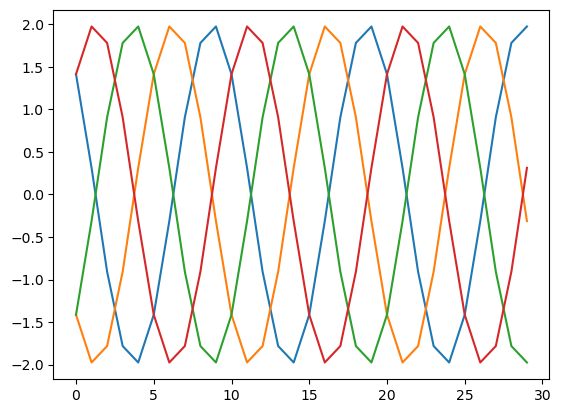

In [202]:
plt.plot(Sinal0)
plt.plot(Sinal1)
plt.plot(Sinal2)
plt.plot(Sinal3)
N

In [203]:
sinal = np.zeros(int(len(mensagem)*(N/2))) # array onde vamos guardar o sinal a enviar
for i in range(0,int(len(mensagem)/2)):
    if mensagem[i*2] == 0 and mensagem[i*2+1] == 0:
        sinal[i*N:(i+1)*N] = Sinal0
    elif mensagem[i*2]== 0 and mensagem[i*2+1]==1:
        sinal[i*N:(i+1)*N] = Sinal1
    elif mensagem[i*2]== 1 and mensagem[i*2+1]==0:
        sinal[i*N:(i+1)*N] = Sinal2
    else:
        sinal[i*N:(i+1)*N] = Sinal3

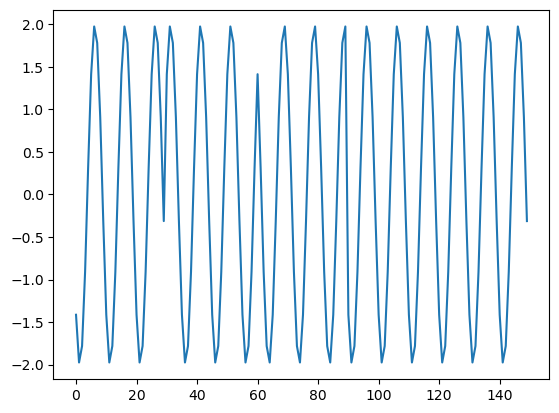

In [204]:
plt.plot(sinal[0:5*N])

# Canal de Comunicação

## Gerar ruido que segue uma distribuição Gaussiana

In [206]:
desvioPadrao = 1 #era 3 mas foi baixado para uma maior precisão mais adiante
ruido = desvioPadrao*np.random.randn(len(sinal))

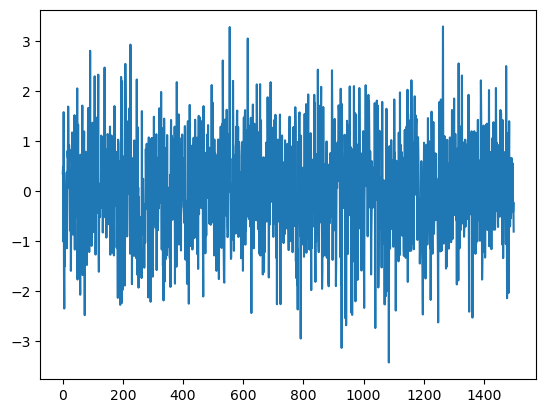

In [207]:
plt.plot(ruido)

In [208]:
np.mean(ruido)

0.03574888425668457

In [209]:
np.std(ruido)

0.988460112462353

plt.hist(ruido, bins = 50)

In [211]:
y = sinal + ruido

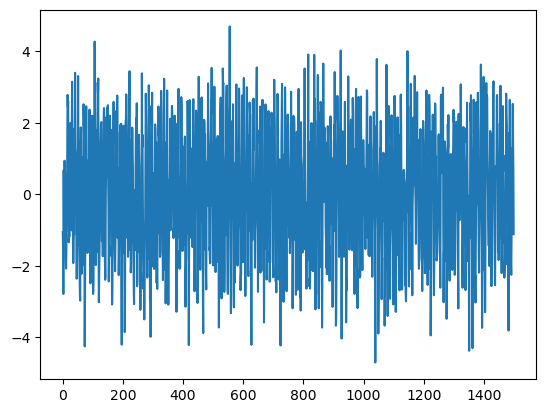

In [212]:
plt.plot(y)

# Receptor - Filtro Adaptado

In [214]:
decisoes = np.zeros(len(mensagem))
arrayMxs = np.zeros(int(len(mensagem)/2))
arrayMys = np.zeros(int(len(mensagem)/2))
phi1 = np.cos(2*np.pi*fc*t)
phi2 = np.sin(2*np.pi*fc*t)

for indice in range(int(len(mensagem)/2)):
    #print(indice)0
    mx = np.sum( y[indice*N:indice*N+N] * phi1)
    my = np.sum( y[indice*N:indice*N+N] * phi2)
    #print(m)
    arrayMxs[indice] = mx
    arrayMys[indice] = my
    if mx > 0 and my > 0: #00
        decisoes[indice*2:indice*2+2] = [0,0]
    elif mx < 0 and my < 0: #01
        decisoes[indice*2:indice*2+2] = [0,1]
    elif mx < 0 and my > 0: #01
        decisoes[indice*2:indice*2+2] = [1,0]
    else:
        decisoes[indice*2:indice*2+2] = [1,1]

(array([3., 8., 8., 7., 3., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 7.,
        6., 3., 1.]),
 array([-29.80047178, -26.81156834, -23.8226649 , -20.83376146,
        -17.84485802, -14.85595458, -11.86705114,  -8.8781477 ,
         -5.88924425,  -2.90034081,   0.08856263,   3.07746607,
          6.06636951,   9.05527295,  12.04417639,  15.03307983,
         18.02198327,  21.01088672,  23.99979016,  26.9886936 ,
         29.97759704]),
 <BarContainer object of 20 artists>)

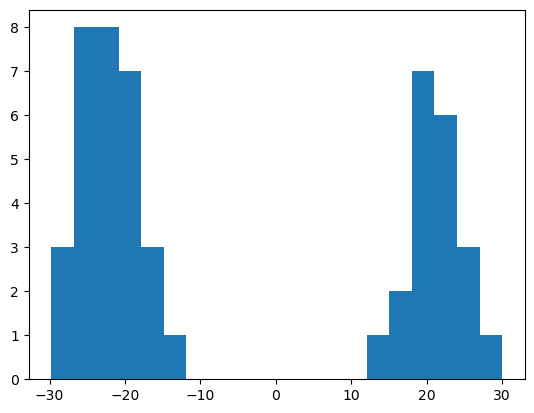

In [215]:
plt.hist(arrayMxs,bins=20)

(array([2., 0., 8., 4., 6., 2., 1., 0., 0., 0., 0., 0., 0., 1., 0., 2., 5.,
        8., 8., 3.]),
 array([-32.5333808 , -29.47385456, -26.41432833, -23.35480209,
        -20.29527586, -17.23574962, -14.17622338, -11.11669715,
         -8.05717091,  -4.99764468,  -1.93811844,   1.12140779,
          4.18093403,   7.24046026,  10.2999865 ,  13.35951273,
         16.41903897,  19.4785652 ,  22.53809144,  25.59761767,
         28.65714391]),
 <BarContainer object of 20 artists>)

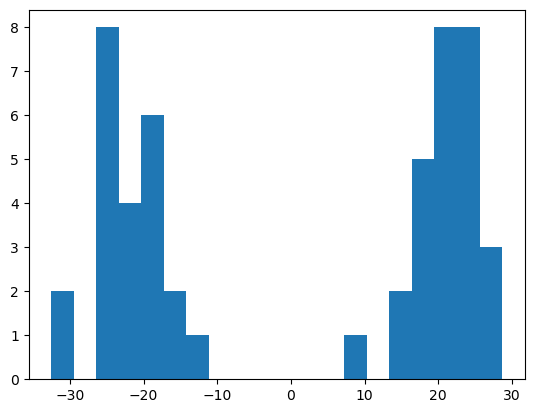

In [216]:
plt.hist(arrayMys,bins=20)

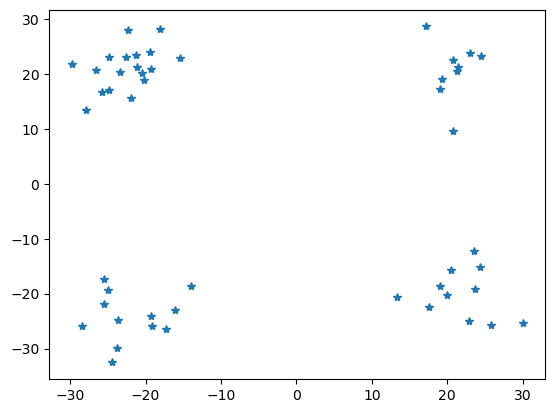

In [217]:
plt.plot(arrayMxs,arrayMys, '*')

In [218]:
decisoes == mensagem

array([ True,  True, False, False, False, False,  True,  True,  True,
        True, False, False, False, False, False, False,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
       False,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True, False, False, False, False,  True,  True,  True,
        True])